In [39]:
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt

In [40]:
helix_dir = os.path.join(os.getcwd(), 'helices')

In [41]:
coarse_list = [_.split('_')[0:3] for _ in os.listdir(helix_dir) if _.split('_')[-1] == 'coarse.txt']
fine_list = [_.split('_')[0:3] for _ in os.listdir(helix_dir) if _.split('_')[-1] == 'all.txt']
print(len(coarse_list), len(fine_list))

coarse_set = set([tuple(_) for _ in coarse_list])
fine_set = set([tuple(_) for _ in fine_list])
both = coarse_set.intersection(fine_set)
print(len(both))

818 818
818


In [42]:
hcm_coarse = []
opd_coarse = []
# set_diam = []
hcm_fine = []
opd_fine = []
lengths = []

for helix in list(both):
# for helix in list(coarse_set):
    helix_id = helix[0] + '_' + helix[1] + '_' + helix[2]
    coarse_file = helix_id + '_coarse.txt'
    fine_file = helix_id + '_all.txt'
    try:
        pdb, chain, helix_idx, helix_len, hcm_coarse_, opd_coarse_ = np.loadtxt(os.path.join(helix_dir, coarse_file), dtype=str)
        _, _, _, _, hcm_fine_, opd_fine_ = np.loadtxt(os.path.join(helix_dir, fine_file), dtype=str)
        # print(coarse_file)
    except:
        continue
    
    hcm_coarse.append(float(hcm_coarse_))
    opd_coarse.append(float(opd_coarse_))
    # set_diam.append(float(set_diam_))
    hcm_fine.append(float(hcm_fine_))
    opd_fine.append(float(opd_fine_))
    lengths.append(int(helix_len))

In [43]:
hcm_coarse = np.array(hcm_coarse)
opd_coarse = np.array(opd_coarse)
hcm_fine = np.array(hcm_fine)
opd_fine = np.array(opd_fine)
lengths = np.array(lengths)
print(len(lengths))


818


In [44]:
hcm_coarse = hcm_coarse[lengths >= 4]
opd_coarse = opd_coarse[lengths >= 4]
hcm_fine = hcm_fine[lengths >= 4]
opd_fine = opd_fine[lengths >= 4]
lengths = lengths[lengths >= 4]

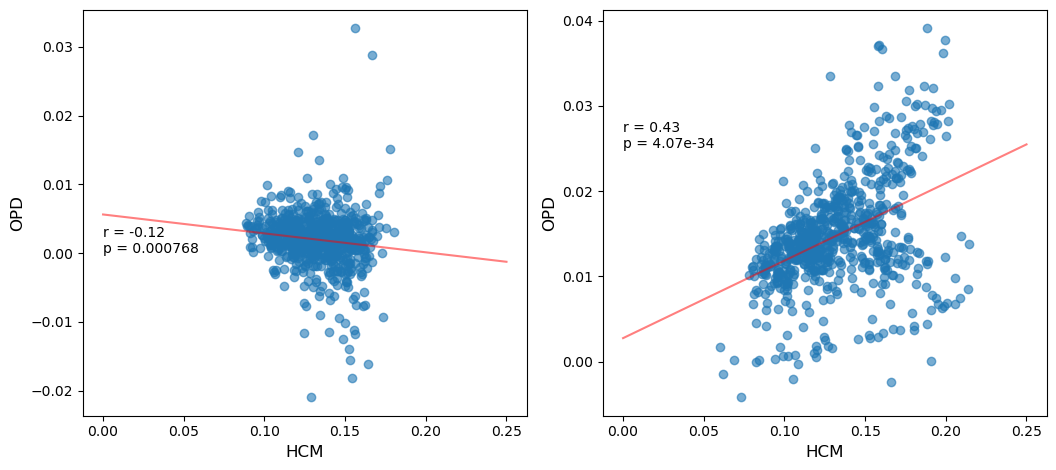

In [47]:
coarse_corr = scipy.stats.pearsonr(hcm_coarse, opd_coarse)
fine_corr = scipy.stats.pearsonr(hcm_fine, opd_fine)

fsize=12

fig = plt.figure(figsize=plt.figaspect(0.45))

ax2 = fig.add_subplot(1, 2, 1)

ax2.scatter(hcm_fine, opd_fine, alpha=0.6, edgecolors=None)

m, b = np.polyfit(hcm_fine, opd_fine, 1)
x = np.linspace(0,0.25, 100)
ax2.plot(x, m*x + b, c='r', alpha=0.5)

# ax2.grid(False)
# ax2.axis('scaled')
# ax2.set_xlim(0,15)
# ax2.set_ylim(-0.1,0.1)
ax2.set_xlabel('HCM', fontsize=fsize)
ax2.set_ylabel('OPD', fontsize=fsize)
ax2.annotate('r = %s\np = %s' % (float('%.2g' % fine_corr[0]), float('%.3g' % fine_corr[1])), (0,0))
# ax2.annotate('r = %s' % float('%.1g' % opd_corr[0]), (-0.093,0.088))
# ax2.annotate('p = 0.20', (-0.093,0.08))
# ax2.tick_params(axis='x', labelrotation=30)
# # ax2.annotate('p = %s' % float('%.2g' % opd_corr[1]), (-0.093,0.08))

ax0 = fig.add_subplot(1, 2, 2)
ax0.scatter(hcm_coarse, opd_coarse, alpha=0.6, edgecolors=None)
# ax0.scatter(lengths, opd_coarse, alpha=0.6, edgecolors=None)


m, b = np.polyfit(hcm_coarse, opd_coarse, 1)
x = np.linspace(0,0.25, 100)
ax0.plot(x, m*x + b, c='r', alpha=0.5)

ax0.grid(False)
# ax0.axis('scaled')
# ax0.set_xlim(0,15)
# ax0.set_ylim(0,0.25)
ax0.set_xlabel('HCM', fontsize=fsize)
ax0.set_ylabel('OPD', fontsize=fsize)
ax0.annotate('r = %s\np = %s' % (float('%.2g' % coarse_corr[0]), float('%.3g' % coarse_corr[1])), (0,0.025))
# ax0.annotate('p = %s' % float('%.3g' % fine_corr[1]), (0,0))



plt.tight_layout()
# plt.savefig('ints_CA.png', dpi=600)
plt.show()